In [64]:
# Coded by Carlos Goes (Instituto Mercado Popular)

# This do file aims at
# 1. generating stationary and non-stationary data
# 2. providing examples of spurious regressions

# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Define length of time series

tlength = 10000

# Define number of non-stationary series to be created

wide = 5

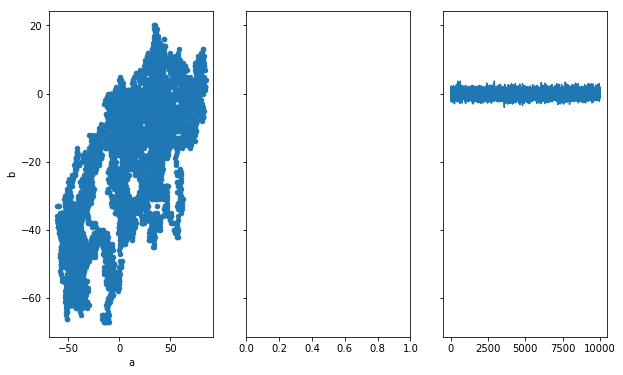

In [65]:
# Generate and plot a stationary series using the built-in command

stationary = np.random.randn(tlength)
plt.plot(stationary)
plt.show()

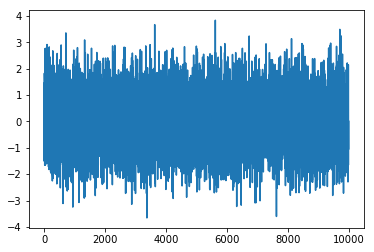

In [66]:
# Generate and plot a stationary series using a loop

holder = [] 

for i in range(tlength):
    e = np.random.randn()
    holder.append(e)

plt.plot(holder)
plt.show()

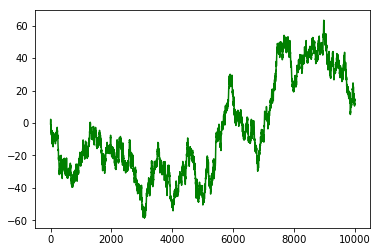

In [67]:
# Generate and plot a non-stationary series using a loop

holder = [] 

for i in range(tlength):
    if i == 0:  # generates a random observation for the first period
        b = np.random.randn()
        holder.append(b)    
    else: # adds a new random number to the past observations for subsequent observations
        e = np.random.randn()
        b = holder[i-1] + e
        holder.append(b)

plt.plot(holder, 'green')
plt.show()

In [68]:
# Generalize non-stationary as a program

def nonstationary(n):
    holder = []
    for i in range(n):
        if i == 0:
            b = np.random.randn()
            holder.append(b)    
        else:
            e = np.random.randn()
            b = holder[i-1] + e
            holder.append(b)
    return holder

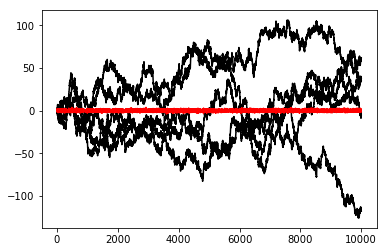

In [69]:
# Generate n nonstationary series and compare them to a stationary series

matrixns = np.matrix([[0 for x in range(wide)] for y in range(tlength)])

for i in range(wide):
    data = nonstationary(tlength)
    matrixns[:,i] = np.transpose(np.matrix(data))
    plt.plot(matrixns[:,i], 'black')

plt.plot(stationary, 'red')
    
plt.show()

In [70]:
# Generalize stationary series generators as a program

def arstationary(n,alpha):
    if alpha >= 1:
        print("Alpha needs to be smaller than one")
    else:
        holder = []
        for i in range(n):
            if i == 0:
                b = np.random.randn()
                holder.append(b)    
            else:
                e = np.random.randn()
                b = alpha * holder[i-1] + e
                holder.append(b)
        return holder

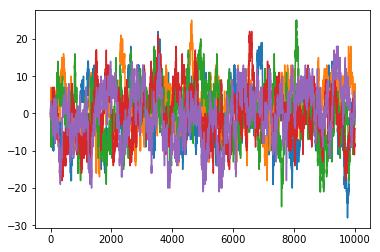

In [71]:
# Generate n nonstationary series and compare them to a stationary series

matrix = np.matrix([[0 for x in range(wide)] for y in range(tlength)])

for i in range(wide):
    data = arstationary(tlength,0.99)
    matrix[:,i] = np.transpose(np.matrix(data))
    plt.plot(matrix[:,i])
    
plt.show()

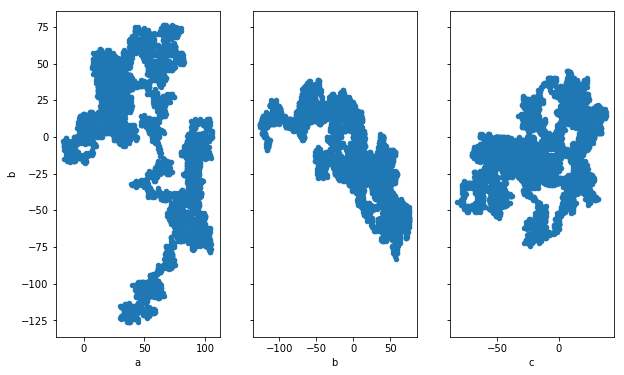

In [72]:
# Define dataframe from simulated series
df = pd.DataFrame(matrixns, columns=('a','b','c','d','e'))

fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='a', y='b', ax=axs[0], figsize=(10, 6))
df.plot(kind='scatter', x='b', y='c', ax=axs[1])
df.plot(kind='scatter', x='c', y='d', ax=axs[2])
plt.show()

In [73]:
# Fit Linear models
lm = smf.ols(formula='a ~ b', data = df).fit()
lm2 = smf.ols(formula='b ~ c', data = df).fit()
lm3 = smf.ols(formula='c ~ d', data = df).fit()
lm4 = smf.ols(formula='d ~ e', data = df).fit()

In [74]:
# Print outputs
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      a   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     1809.
Date:                Tue, 28 Feb 2017   Prob (F-statistic):               0.00
Time:                        00:45:21   Log-Likelihood:                -47601.
No. Observations:               10000   AIC:                         9.521e+04
Df Residuals:                    9998   BIC:                         9.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     49.9552      0.283    176.808      0.000        49.401    50.509
b             -0.2428      0.006    -42.530      0.000        -0.254    -0.232
==============================================================================
Omnibus:                     2965.486   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.881
Skew:                          -0.128   Prob(JB):                    1.39e-105
Kurtosis:                       1.955   Cond. No.                         49.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      b   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                 1.500e+04
Date:                Tue, 28 Feb 2017   Prob (F-statistic):               0.00
Time:                        00:45:21   Log-Likelihood:                -48627.
No. Observations:               10000   AIC:                         9.726e+04
Df Residuals:                    9998   BIC:                         9.727e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -23.4794      0.368    -63.889      0.000       -24.200   -22.759
c             -1.3761      0.011   -122.461      0.000        -1.398    -1.354
==============================================================================
Omnibus:                      419.077   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.546
Skew:                          -0.529   Prob(JB):                    2.44e-103
Kurtosis:                       3.121   Cond. No.                         38.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      c   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     1693.
Date:                Tue, 28 Feb 2017   Prob (F-statistic):               0.00
Time:                        00:45:21   Log-Likelihood:                -46679.
No. Observations:               10000   AIC:                         9.336e+04
Df Residuals:                    9998   BIC:                         9.338e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -11.5256      0.291    -39.549      0.000       -12.097   -10.954
d              0.4429      0.011     41.141      0.000         0.422     0.464
==============================================================================
Omnibus:                     1041.843   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.308
Skew:                           0.058   Prob(JB):                     3.73e-66
Kurtosis:                       2.158   Cond. No.                         30.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     2079.
Date:                Tue, 28 Feb 2017   Prob (F-statistic):               0.00
Time:                        00:45:21   Log-Likelihood:                -44998.
No. Observations:               10000   AIC:                         9.000e+04
Df Residuals:                    9998   BIC:                         9.001e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -11.2259      0.220    -51.024      0.000       -11.657   -10.795
e              0.3437      0.008     45.591      0.000         0.329     0.358
==============================================================================
Omnibus:                      537.901   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              534.037
Skew:                          -0.522   Prob(JB):                    1.08e-116
Kurtosis:                       2.561   Cond. No.                         29.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""